# Project 2: Classification of Spam Emails
## Feature Selection, Logistic Regression, Cross Validation
## Due Date: Thursday 12/12/19, 11:59PM

In Project 2, we will develop a model that can classify spam emails from non-spam emails. Spam means junk, commercial or bulk. Non-spam is nicknamed ham.  

We have provided you some code to help steer your analysis. We will evaluate the accuracy of your model along with your textual responses and visualizations. 

Following Project 2, you should have practice with...

- Encoding text with number to determine features from written documents
- Using sklearn packages to process data and fit models
- Validating the performance of your model and reducing overfitting
- Generating and analyzing precision-recall curves

### Submission Instructions
For this assignment, you will submit a copy to Gradescope. Follow these steps

1. Download as HTML (`File->Download As->HTML(.html)`). 
1. Open the HTML in the browser. Print to .pdf 
1. Upload to Gradescope. Tag your answers. 

Note that 

- Please map your answers to our questions. Otherwise you may lose points. Please see the rubric below. 
- You should break long lines of code into multiple lines. Otherwise your code will extend out of view from the cell. Consider using `\` followed by a new line. 
- For each textual response, please include relevant code that informed your response. For each plotting question, please include the code used to generate the plot.
- You should not display large output cells such as all rows of a table. Instead convert the input cell from Code to Markdown back to Code to remove the output cell.

Moreover you will submit a copy on Jupyter Hub under Assignments Tab. You cannot access the extension in JupyterLab. So if the URL ends with lab, then please change it to tree 

`https://pds-f19.jupyter.hpc.nyu.edu/user/[Your NetID]/tree`

Consult the instructional video 

`https://nbgrader.readthedocs.io/en/stable/_images/student_assignment.gif` 

for steps to... 
 1. fetch 
 1. modify 
 1. optionally validate
 1. submit your project

Failure to follow these guidelines for submission could mean the deduction of two points. See the rubric below.

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your solution.


**Collaborators**: *list collaborators here*

Pooja Patel

### Rubric
Question | Points
--- | ---
Submission Instructions | 2
1a | 1
1b | 1
1c | 2
2 | 3
3a | 2
3b | 2
4 | 2
5 | 2
6a | 1
6b | 1
6c | 2
6d | 2
6e | 1
6f | 3
7 | 3
8a | 2
8b | 1
Extra Credit | 5
Total | 33

Please import the following packages

In [1]:
from IPython.display import display, Markdown, Image
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve

### 1. Loading in the Data

In email classification, our goal is to classify emails as spam or not spam (referred to as "ham") using features generated from the text in the email. 

The dataset consists of email messages and their labels (0 for ham, 1 for spam). Your labeled training dataset contains 8348 labeled examples, and the test set contains 1000 unlabeled examples.

Run the following cells to load in the data into DataFrames.

The `train` DataFrame contains labeled data that you will use to train your model. It contains four columns:

1. `id`: An identifier for the training example
1. `subject`: The subject of the email
1. `email`: The text of the email
1. `spam`: 1 if the email is spam, 0 if the email is ham (not spam)

The `test` DataFrame contains 1000 unlabeled emails. You will predict labels for these emails.

In [2]:
# Load the data 
original_training_data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Convert the emails to lower case as a first step to processing the text
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

,id,subject,email,spam
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0
2,2,Subject: It's just too small ...,<html>\n <head>\n </head>\n <body>\n <font siz...,1
3,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0


### Question 1a
First, let's check if our data contains any missing values. Fill in the cell below to print the number of NaN values in each column. If there are NaN values, replace them with appropriate filler values (i.e., NaN values in the `subject` or `email` columns should be replaced with empty strings). Print the number of NaN values in each column after this modification to verify that there are no NaN values left.

Note that while there are no NaN values in the `spam` column, we should be careful when replacing NaN labels. Doing so without consideration may introduce significant bias into our model when fitting.

In [4]:
# YOUR CODE HERE
original_training_data['subject'].fillna('',inplace=True)
original_training_data['email'].fillna('',inplace=True)
test['email'].fillna('',inplace=True)
test['subject'].fillna('',inplace=True)
#original_training_data.isnull().sum()
#raise NotImplementedError()

In [5]:
# TEST
assert original_training_data.isnull().sum().sum() == 0

### Question 1b

In the cell below, print the text of the first ham and the fourth spam email in the original training set.

In [6]:
first_ham = (original_training_data[original_training_data['spam']==0]['email']
             .iloc[0])
fourth_spam = (original_training_data[original_training_data['spam']==1]['email']
             .iloc[3])

# YOUR CODE HERE
#raise NotImplementedError()

print("Ham \n", first_ham)
print("Spam \n", fourth_spam)

Ham 
 url: http://boingboing.net/#85534171
 date: not supplied
 
 arts and letters daily, a wonderful and dense blog, has folded up its tent due 
 to the bankruptcy of its parent company. a&l daily will be auctioned off by the 
 receivers. link[1] discuss[2] (_thanks, misha!_)
 
 [1] http://www.aldaily.com/
 [2] http://www.quicktopic.com/boing/h/zlfterjnd6jf
 
 

Spam 
 dear ricardo1 ,
 
 <html>
 <body>
 <center>
 <b><font color = "red" size = "+2.5">cost effective direct email advertising</font><br>
 <font color = "blue" size = "+2">promote your business for as low as </font><br>
 <font color = "red" size = "+2">$50</font> <font color = "blue" size = "+2">per 
 <font color = "red" size = "+2">1 million</font>
 <font color = "blue" size = "+2"> email addresses</font></font><p>
 <b><font color = "#44c300" size ="+2">maximize your marketing dollars!<p></font></b>
 <font size = "+2">complete and fax this information form to 309-407-7378.<br>
 a consultant will contact you to discuss your 

In [7]:
# TEST
assert len(first_ham) > 0 and first_ham[:0] == ''
assert len(fourth_spam) > 0 and fourth_spam[:0] == ''

### Question 1c

Discuss one thing you notice that is different between the two emails that might relate to the identification of spam.

In [8]:
# YOUR CODE HERE
"""The ham email contains normal looking text, while 
    the spam is all in markdown"""
#raise NotImplementedError()

'The ham email contains normal looking text, while \n    the spam is all in markdown'

## Training Validation Split
The training data is available for both training models and **validating** the models that we train.  We therefore need to split the training data into separate training and validation datsets.  You will need this **validation data** to assess the performance of your classifier once you are finished training. Note that we set the seed (random_state) to 42. This will produce a pseudo-random sequence of random numbers that is the same for every student. Do not modify this in the following questions, as our tests depend on this random seed.

In [9]:
train, val = train_test_split(original_training_data, test_size=0.1, random_state=42)

## 2. Feature Selection

We would like to take the text of an email and predict whether the email is ham or spam. This is a *classification* problem, so we can use logistic regression to train a classifier. Recall that to train an logistic regression model we need a numeric feature matrix $X$ and a vector of corresponding binary labels $y$.  Unfortunately, our data are text, not numbers. To address this, we can create numeric features derived from the email text and use those features for logistic regression.

Each row of $X$ is an email. Each column of $X$ contains one feature for all the emails. We'll guide you through creating a simple feature, and you'll create more interesting ones when you are trying to increase your accuracy.

### Question 2

Create a function called `words_in_texts` that takes in a list of `words` and a pandas Series of email `texts`. It should output a 2-dimensional NumPy array containing one row for each email text. The row should contain either a 0 or a 1 for each word in the list: 0 if the word doesn't appear in the text and 1 if the word does. For example:

```
>>> words_in_texts(['hello', 'bye', 'world'], 
                   pd.Series(['hello', 'hello worldhello']))

array([[1, 0, 0],
       [1, 0, 1]])
```

In [10]:
# YOUR CODE HERE
def words_in_texts(words, texts):
    indicator_array = []
    for text in texts:
        indicator_array.append([1 if word in text else 0 for word in words])
    return np.array(indicator_array)
#raise NotImplementedError()

In [11]:
# TEST
assert np.allclose(words_in_texts(['hello', 'bye', 'world'], 
                           pd.Series(['hello', 'hello worldhello'])),
            np.array([[1, 0, 0], 
                      [1, 0, 1]])) == True

## 3. Visualization
We need to identify some features that allow us to distinguish spam emails from ham emails. One idea is to compare the distribution of a single feature in spam emails to the distribution of the same feature in ham emails. If the feature is itself a binary indicator, such as whether a certain word occurs in the text, this amounts to comparing the proportion of spam emails with the word to the proportion of ham emails with the word.


The following plot (which was created using `sns.barplot`) compares the proportion of emails in each class containing a particular set of words. 

You will want to use DataFrame's `.melt` method to "unpivot" a DataFrame. 

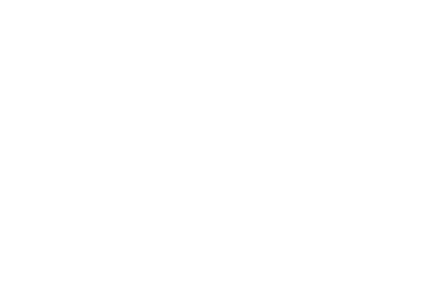

In [12]:
Image('./training_conditional_proportions.png')

In [13]:
df = pd.DataFrame({
    'word_1': [1, 0, 1, 0],
    'word_2': [0, 1, 0, 1],
    'type': ['spam', 'ham', 'ham', 'ham']
})
display(df)

,word_1,word_2,type
0,1,0,spam
1,0,1,ham
2,1,0,ham
3,0,1,ham


Our Original DataFrame has some words column and a type column. You can think of each row is a sentence, and the value of 1 or 0 indicates the number of occurances of the word in this sentence.

In [14]:
df.melt("type")

,type,variable,value
0,spam,word_1,1
1,ham,word_1,0
2,ham,word_1,1
3,ham,word_1,0
4,spam,word_2,0
5,ham,word_2,1
6,ham,word_2,0
7,ham,word_2,1


`melt` will turn columns into variable, notice how `word_1` and `word_2` become `variable`, their values are stored in the value column"

### Question 3a

Create a bar chart like the one above comparing the proportion of spam and ham emails containing certain words. Choose a set of words that are different from the ones above, but also have different proportions for the two classes. Make sure to only consider emails from `train`. Save the bar chart as `training_conditional_proportions.png`


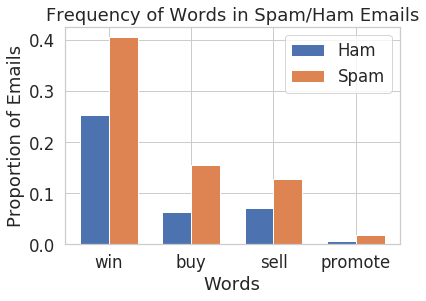

<Figure size 432x288 with 0 Axes>

In [15]:
train=train.reset_index(drop=True)

# YOUR CODE HERE
words_set = ['win', 'buy','sell','promote']
ham_emails_contents = train[train['spam'] == 0]['email']
spam_emails_contents = train[train['spam'] == 1]['email']
words_in_ham = words_in_texts(words_set, ham_emails_contents)
words_in_spam = words_in_texts(words_set, spam_emails_contents)
words_in_ham_cnt = np.sum(words_in_ham, axis=0)
words_in_spam_cnt = np.sum(words_in_spam, axis=0)

bar_width = 0.35
plt.bar(x=words_set,align='edge',height=words_in_ham_cnt/len(ham_emails_contents), label='Ham',width=-bar_width)
plt.bar(x=words_set,align='edge',height=words_in_spam_cnt/len(spam_emails_contents), label='Spam',width=bar_width)
plt.legend()
plt.xlabel('Words')
plt.ylabel('Proportion of Emails')
plt.title('Frequency of Words in Spam/Ham Emails')
plt.show()
#raise NotImplementedError()
plt.savefig("training_conditional_proportions.png")


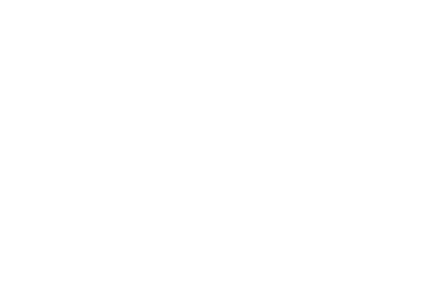

In [16]:
# RUN 

Image('training_conditional_proportions.png')

When the feature is binary, it makes sense to compare its proportions across classes (as in the previous question). Otherwise, if the feature can take on numeric values, we can compare the distributions of these values for different classes. 

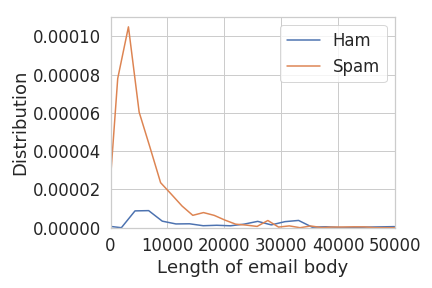

In [17]:
Image('training_conditional_densities2.png')

### Question 3b

Create a *class conditional density plot* like the one above (using `sns.distplot`), comparing the distribution of the length of spam emails to the distribution of the length of ham emails in the training set. Set the x-axis limit from 0 to 50000.



Text(0.5, 0, 'Length of email body')

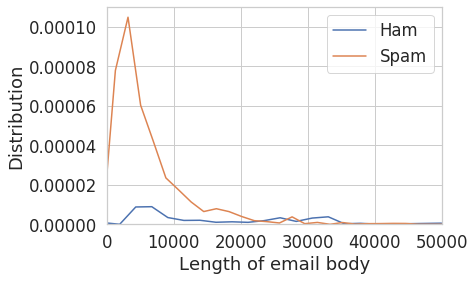

In [18]:
# YOUR CODE HERE
spam_lens = [len(t) for t in train[train['spam'] == 1]['email']]
ham_lens = [len(t) for t in train[train['spam'] == 0]['email']]

plt.xlim(0, 50000)
sns.distplot(ham_lens, label='Ham', hist=False)
sns.distplot(spam_lens, label='Spam', hist=False)
plt.legend()
plt.ylabel('Distribution')
plt.xlabel('Length of email body')
#raise NotImplementedError()

## 4. Classification

Notice that the output of `words_in_texts(words, train['email'])` is a numeric matrix containing features for each email. This means we can use it directly to train a classifier!

### Question 4

We've given you 5 words that might be useful as features to distinguish spam/ham emails. Use these words as well as the `train` DataFrame to create two NumPy arrays: `X_train` and `Y_train`.

`X_train` should be a matrix of 0s and 1s created by using your `words_in_texts` function on all the emails in the training set.

`Y_train` should be a vector of the correct labels for each email in the training set.

In [19]:
some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = (np.array(words_in_texts(some_words, train['email'])).astype(int))
Y_train = train['spam']

# YOUR CODE HERE
#raise NotImplementedError()

X_train[:5], Y_train[:5]

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]]), 0    0
 1    0
 2    0
 3    0
 4    0
 Name: spam, dtype: int64)

In [20]:
# TEST
assert X_train.shape == (7513, 5) # X matrix should have a certain size
assert np.all(np.unique(X_train) == np.array([0, 1])) # X matrix should consist of only 0 or 1

## Fitting the Model

### Question 5

Now we have matrices we can give to scikit-learn! Using the [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier, train a logistic regression model using `X_train` and `Y_train`. Then, output the accuracy of the model (on the training data) in the cell below. You should get an accuracy around 0.75.



In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

# YOUR CODE HERE
#raise NotImplementedError()

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.7576201251164648


In [22]:
# TEST
assert training_accuracy > 0.72

## 6. Evaluating Classifiers

That doesn't seem too shabby! But the classifier you made above isn't as good as this might lead us to believe. First, we are evaluating accuracy on the training set, which may lead to a misleading accuracy measure, especially if we used the training set to identify discriminative features. In future parts of this analysis, it will be safer to hold out some of our data for model validation and comparison.

Presumably, our classifier will be used for **filtering**, i.e. preventing messages labeled `spam` from reaching someone's inbox. There are two kinds of errors we can make:
- False positive (FP): a ham email gets flagged as spam and filtered out of the inbox.
- False negative (FN): a spam email gets mislabeled as ham and ends up in the inbox.

These definitions depend both on the true labels and the predicted labels. False positives and false negatives may be of differing importance, leading us to consider more ways of evaluating a classifier, in addition to overall accuracy:

**Precision** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FP}}$ of emails flagged as spam that are actually spam.

**Recall** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FN}}$ of spam emails that were correctly flagged as spam. 

**False-alarm rate** measures the proportion $\frac{\text{FP}}{\text{FP} + \text{TN}}$ of ham emails that were incorrectly flagged as spam. 

The following image might help:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="400px">

Note that a true positive (TP) is a spam email that is classified as spam, and a true negative (TN) is a ham email that is classified as ham.

### Question 6a

Suppose we have a classifier `zero_predictor` that always predicts 0 (never predicts positive). How many false positives and false negatives would this classifier have if it were evaluated on the training set and its results were compared to `Y_train`? Fill in the variables below (answers can be hard-coded):

In [23]:
zero_predictor_fp = 0
zero_predictor_fn = len(train[train['spam'] == 1])

# YOUR CODE HERE
#raise NotImplementedError()

In [24]:
# TEST
assert zero_predictor_fp >= 0
assert zero_predictor_fn >= 0

### Question 6b

What are the accuracy and recall of `zero_predictor` (classifies every email as ham) on the training set? Do NOT use any `sklearn` functions.

In [25]:
zero_predictor_acc = len(train[train['spam'] == 0]) / len(train)
zero_predictor_recall = 0

# YOUR CODE HERE
#raise NotImplementedError()

In [26]:
# TEST
assert zero_predictor_acc >= 0
assert zero_predictor_recall >= 0

### Question 6c

Provide brief explanations of the results from 6a and 6b. Why do we observe each of these values (FP, FN, accuracy, recall)?

In [27]:
# YOUR CODE HERE
print("""6a: Because the zero predictor always predicts 0 and 
    never predicts true positive, it wont predict positive so 
    false positive is 0 and the false negative is the total 
    number of spams \n 6b: Since emails are considered spam
    the accuracy is the hams divided by total emails \n We
    need to observe the \n FP: to know the ham emails flagged
    as spam and removed from inbox \n FN: to know number of spam
    emails mislables as hams that end up in the inbox \n accuracy
    to know how many hams are correctly labeled \n recall
    to know how many spams are labeled spam, but since its the 
    zero predictor, none are labeled""")
#raise NotImplementedError()

6a: Because the zero predictor always predicts 0 and 
    never predicts true positive, it wont predict positive so 
    false positive is 0 and the false negative is the total 
    number of spams 
 6b: Since emails are considered spam
    the accuracy is the hams divided by total emails 
 We
    need to observe the 
 FP: to know the ham emails flagged
    as spam and removed from inbox 
 FN: to know number of spam
    emails mislables as hams that end up in the inbox 
 accuracy
    to know how many hams are correctly labeled 
 recall
    to know how many spams are labeled spam, but since its the 
    zero predictor, none are labeled


### Question 6d

Consider the the `LogisticRegression` model from Question 5. Without using any `sklearn` functions, compute the precision, recall, and false-alarm rate of on the training set.


In [28]:
Y_train_hat = model.predict(X_train)


# # YOUR CODE HERE
# #raise NotImplementedError()


TP = np.sum(Y_train_hat & Y_train)
FP = np.sum(Y_train_hat) - TP
TN = np.sum(Y_train==0) - FP
FN = np.sum(Y_train) - TP


logistic_predictor_precision = TP / (TP + FP) 
logistic_predictor_recall = TP / (TP + FN) 
logistic_predictor_far = FP / (FP + TN) 

In [29]:
# TEST
assert logistic_predictor_precision >= 0
assert logistic_predictor_recall >= 0
assert logistic_predictor_far >= 0

Without using any `sklearn` functions, compute the precision, recall, and false-alarm rate of on the validation set.

In [30]:
X_val = words_in_texts(some_words, val['email']) 
Y_val = np.array(val['spam']) 
Y_val_hat = model.predict(X_val)

TP = np.sum(Y_val_hat & Y_val)
FP = np.sum(Y_val_hat) - TP
TN = np.sum(Y_val==0) - FP
FN = np.sum(Y_val) - TP

# YOUR CODE HERE
logistic_predictor_precision = TP / (TP + FP) 
logistic_predictor_recall = TP / (TP + FN) 
logistic_predictor_far = FP / (FP + TN) 
#raise NotImplementedError()

We can visualize these numbers on the validation set with a confusion matrix.

Executing the following cell should produce an image like...

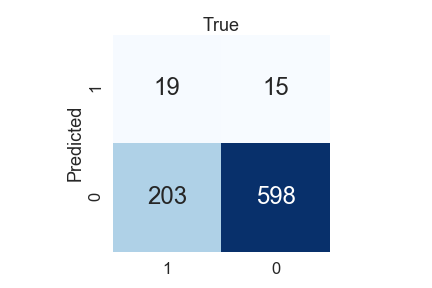

In [31]:
Image('confusion_matrix.PNG')

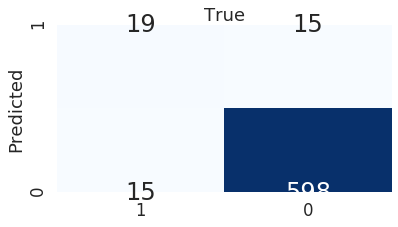

In [32]:
def plot_confusion(confusion):
    sns.heatmap(confusion, annot=True, fmt='d',
                cmap="Blues", annot_kws={'fontsize': 24}, square=True,
                xticklabels=[1, 0], yticklabels=[1, 0], cbar=False)
    plt.gca().xaxis.set_label_position('top')
    plt.xlabel('True')
    plt.ylabel('Predicted')

confusion = np.array([
    [TP, FP],
    [FP, TN],
])
    
plot_confusion(confusion)

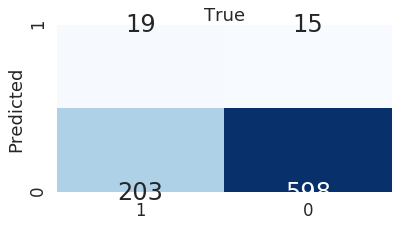

In [33]:
"""ERROR IN ABOVE BLOCK I CANNOT EDIT """
def plot_confusion(confusion):
    sns.heatmap(confusion, annot=True, fmt='d',
                cmap="Blues", annot_kws={'fontsize': 24}, square=True,
                xticklabels=[1, 0], yticklabels=[1, 0], cbar=False)
    plt.gca().xaxis.set_label_position('top')
    plt.xlabel('True')
    plt.ylabel('Predicted')

confusion = np.array([
    [TP, FP],
    [FN, TN],
])
    
plot_confusion(confusion)

### Question 6e

Are there more false positives or false negatives when using the logistic regression classifier from Question 5?


In [34]:
# YOUR CODE HERE
"""more false negatives"""
#raise NotImplementedError()

'more false negatives'

### Question 6f

1. Our logistic regression classifier got 75.6% prediction accuracy (number of correct predictions / total). How does this compare with predicting 0 for every email?
1. Given the word features we gave you above, name one reason this classifier is performing poorly. Hint: Think about how prevalent these words are in the email set.
1. Which of these two classifiers would you prefer for a spam filter and why? Describe your reasoning and relate it to at least one of the evaluation metrics you have computed so far.

In [35]:
# YOUR CODE HERE
print("""

    1.Predicting 0 for every email is 74.47%, which is less 
    than 75.6%, so our logistic regression classifier is better.
    
    2.The words are common in both spam and ham emails.
    
    3.The logistic regression classifier for a spam 
    filter, because it has higher prediction accuracy.

""")
#raise NotImplementedError()



    1.Predicting 0 for every email is 74.47%, which is less 
    than 75.6%, so our logistic regression classifier is better.
    
    2.The words are common in both spam and ham emails.
    
    3.The logistic regression classifier for a spam 
    filter, because it has higher prediction accuracy.




### Question 7: Precision-Recall Curve on Validation

We can trade off between precision and recall. In most cases we won't be able to get both perfect precision (i.e. no false positives) and recall (i.e. no false negatives), so we have to compromise. 

Recall that logistic regression calculates the probability that an example belongs to a certain class. Then, to classify an example we say that an email is spam if our classifier gives it $\ge 0.5$ probability of being spam. However, *we can adjust that cutoff*: we can say that an email is spam only if our classifier gives it $\ge 0.7$ probability of being spam, for example. This is how we can trade off false positives and false negatives.

The precision-recall curve shows this trade off for each possible cutoff probability. In the cell below, [plot a precision-recall curve](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#plot-the-precision-recall-curve) on the validation set. Note that you'll want to use the .predict_proba(...) method for your classifier instead of .predict(...) so you get probabilities, not categories.


In [36]:
Y_val_hat_prob = model.predict_proba(X_val)[:, 1]

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.32')

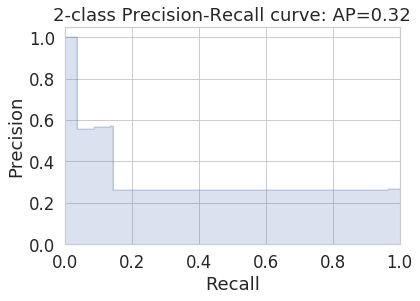

In [37]:
# YOUR CODE HERE
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_val, Y_val_hat_prob)

precision, recall, _ = precision_recall_curve(Y_val, Y_val_hat_prob)

plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
#raise NotImplementedError()

### Question 8: Cross Validation

Take the following function for computing the accuracy of classifications.


In [38]:
def error_rate(y_pred, y_actual):
    return np.mean(y_pred != y_actual )

We want to perform cross validation to compare different choices of words for the classfication. By training and validating multiple times, we can gauge the accuracy of classfications along with the variability of classfications.

In [39]:
def compute_CV_error(model, X_train, Y_train, vocabulary, number_splits = 5):
    kf = KFold(n_splits=number_splits, random_state=42)
    
    vocabulary_errors = dict()
    for words in vocabulary:
        X_train_features = words_in_texts(words, X_train) 

        validation_errors = []        
        for train_idx, valid_idx in kf.split(X_train):
            # split the data
            split_X_train, split_X_valid = X_train_features[train_idx], X_train_features[valid_idx]
            split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]

            # Fit the model on the training split
            model.fit(split_X_train,split_Y_train)

            # Compute the accuracy on the validation split
            error = error_rate(model.predict(split_X_valid), split_Y_valid)

            validation_errors.append(error)
    
        #average validation errors
        print("For vocabulary {0}".format(",".join(words)), "\n Mean: {0}".format(np.mean(validation_errors)), "\n Standard Deviation {0}\n\n".format(np.std(validation_errors)))
        
        vocabulary_errors[tuple(words)] = {'mean': np.mean(validation_errors), 'std': np.std(validation_errors)}
        
    return vocabulary_errors

### Question 8a
Consider the collection of words `vocabulary1` and `vocabulary2`

In [40]:
vocabulary1 = ['drug', 'bank', 'prescription', 'memo', 'private']
vocabulary2 = ['please', 'money', 'offer', 'receive', 'contact', 'free']

Run `compute_CV_error` on `original_training_data` with `LogisticRegression` model for `vocabulary1` and `vocabulary2`. Call the output `vocabulary_errors`.

In [41]:
vocabulary_errors = compute_CV_error(LogisticRegression(), 
                                     original_training_data['email'],
                                     original_training_data['spam'], 
                                     (vocabulary1, vocabulary2))

# YOUR CODE HERE
#raise NotImplementedError()

For vocabulary drug,bank,prescription,memo,private 
 Mean: 0.24425210693053678 
 Standard Deviation 0.010450263071996146


For vocabulary please,money,offer,receive,contact,free 
 Mean: 0.18795133519659304 
 Standard Deviation 0.009161748314231662




In [42]:
# TEST 

assert np.isclose(vocabulary_errors[tuple(vocabulary1)]['mean'],  0.24425210693053678 )
assert np.isclose(vocabulary_errors[tuple(vocabulary1)]['std'], 0.010450263071996146)

### Question 8b

Which collection of words is more accurate? Which collection of words has more variability in classfications? Which would you choose for determining the features of your model?

In [44]:
# YOUR CODE HERE
"""Vocabulary2 is more accurate because it has a lower mean and in this case Vocabulary1 has a higher variability
because of its higher std. I'd therefore choose Vocabulary2 for its low error and low variability in comparison to 
Vocabulary2"""
#raise NotImplementedError()

"Vocabulary2 is more accurate because it has a lower mean and in this case Vocabulary1 has a higher variability\nbecause of its higher std. I'd therefore choose Vocabulary2 for its low error and low variability in comparison to \nVocabulary2"

## Extra Credit

It is now your task to make the spam filter more accurate. To receive extra credit, you must get at least **88%** accuracy on the test set. Call your predictions `Y_test_hat`. This should be a numpy array consisting of 0 and 1 for each every email in the `test` DataFrame.

Here are some ideas for improving your model:

1. Finding better features based on the email text. Some example features are:
    1. Number of characters in the subject / body
    1. Number of words in the subject / body
    1. Use of punctuation (e.g., how many '!' were there?)
    1. Number / percentage of capital letters 
    1. Whether the email is a reply to an earlier email or a forwarded email
1. Finding better words to use as features. Which words are the best at distinguishing emails? This requires digging into the email text itself. 
1. Better data processing. For example, many emails contain HTML as well as text. You can consider extracting out the text from the HTML to help you find better words. Or, you can match HTML tags themselves, or even some combination of the two.
1. Model selection. You can adjust parameters of your model (e.g. the regularization parameter) to achieve higher accuracy. Recall that you should use cross-validation to do feature and model selection properly! Otherwise, you will likely overfit to your training data.

ou may use whatever method you prefer in order to create features, but **you are not allowed to import any external feature extraction libraries**. In addition, **you are only allowed to train logistic regression models**.

In [63]:
import re
def betterwords(df):
    word_count = {}
    for email in df['email']:
        word_list = re.findall('\w+', email)
        for w in word_list:
            word_count[w] = (word_count[w] + 1) if w in word_count else 1
    return word_count

words = betterwords(original_training_data)
{k: v for k, v in sorted(words.items(), key=lambda item: item[1], reverse=True)}

#from this looking at popular words and characters that sound like they's be spam
features = ['please','free','dollars','good','congrats','prize','won','money','news','click','remove','href']
X_train = np.array(words_in_texts(features, train['email'])).astype(int)
Y_train = train['spam']
model = LogisticRegression().fit(X_train, Y_train)
training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy) 

#Y_test_hat = model.predict(np.vsplit(X_train.values[...,None],original_training_data.shape[0]))

"""If I could i would use CountVectorizer.transform to get the Y_test_hat, but since we cant
import any external feature libraries idk how to do that part"""

Training Accuracy:  0.8964461599893518


'If I could i would use CountVectorizer.transform to get the Y_test_hat, but since we cant\nimport any external feature libraries idk how to do that part'

In [ ]:
# TEST

assert len(Y_test_hat) == 1000
assert np.all(np.unique(Y_test_hat) == [0,1])